In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from shapely.geometry import LineString
import myscripts as ms
import zipfile
import os

# Loading in the shapefiles via GeoPandas

In [2]:
df_node = gpd.read_file("/Users/jseverin/Mobility/Data/Athena/YR18/athena_nodes.shp")
df_line = gpd.read_file("/Users/jseverin/Mobility/Data/Athena/YR18/YR18_M2045_NOV2018_RDWY_shp.shp")


# Printing out first 3 rows to explore data

In [3]:
df_line.head(3)

,ID,LENGTH,DIR,LNKNM,NET_ID,FAC_DIR,STREET,TRDIR,FUNCL,DIVID,...,RTSTEMP,LINKMODE,A_PK,B_PK,C_PK,A_OP,B_OP,C_OP,MODEL_LENG,geometry
0,76698,1.515115,0,31269500.0,76698.0,None,FM455,2,3,2,...,1,1,None,None,None,None,None,None,1.51,"LINESTRING (-96.48095000000001 33.333123, -96...."
1,77196,2.045601,0,23265000.0,77196.0,None,SH78,2,2,1,...,1,1,None,None,None,None,None,None,2.04,"LINESTRING (-96.490139 33.025212, -96.48944 33..."
2,78125,0.764019,0,40772800.0,78125.0,None,LAKE SHORE DR,2,4,1,...,1,1,None,None,None,None,None,None,0.76,"LINESTRING (-96.477452 32.936516, -96.477403 3..."


In [4]:
df_node.head(3)

,ID,CENTROID,PANDR,TRXFER,TSZ,AREATYPE,CYCLE_LENG,STATION_NA,geometry
0,50000,NaN,NaN,NaN,3020,5,NaN,None,POINT (-96.48095000843118 33.33312300013516)
1,50001,NaN,NaN,NaN,3020,5,NaN,None,POINT (-96.45493800843104 33.3322160001369)
2,50002,NaN,NaN,NaN,3397,4,NaN,None,POINT (-96.49013900840185 33.02521200013454)


Text(98.875, 0.5, 'Longitude')

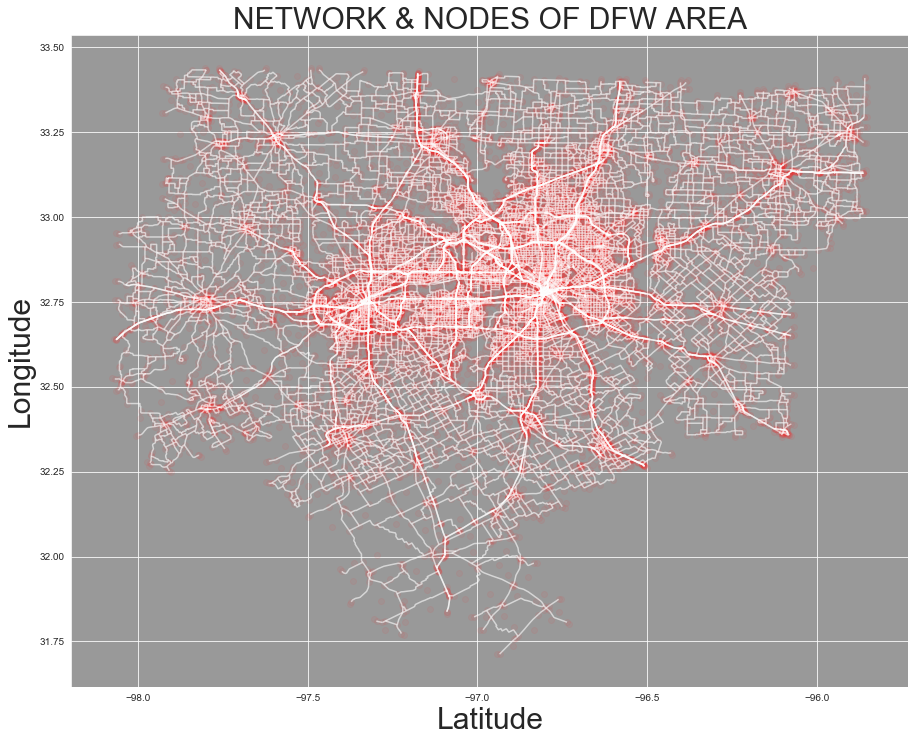

In [5]:
sns.set_style("darkgrid", {"axes.facecolor": ".6"})
fig, ax = plt.subplots(figsize=(15,20))
df_line.plot(color="#ffffFF99", ax=ax)
df_node.plot(color="#ff333310", ax=ax)
ax.set_title('NETWORK & NODES OF DFW AREA', fontdict={'fontsize': 30, 'fontweight': 'medium'})
ax.set_xlabel('Latitude', fontsize=30)
ax.set_ylabel('Longitude', fontsize=30)  

In [6]:
df_node = ms.create_lat_lon(df_node)
df_line = ms.create_lat_lon_N(df_line)

In [7]:
df_line.head(3)

,ID,LENGTH,DIR,LNKNM,NET_ID,FAC_DIR,STREET,TRDIR,FUNCL,DIVID,...,LINKMODE,A_PK,B_PK,C_PK,A_OP,B_OP,C_OP,MODEL_LENG,geometry,lat_lon
0,76698,1.515115,0,31269500.0,76698.0,None,FM455,2,3,2,...,1,None,None,None,None,None,None,1.51,"LINESTRING (-96.48095000000001 33.333123, -96....","[[-96.48095, 33.333123], [-96.480868, 33.33305..."
1,77196,2.045601,0,23265000.0,77196.0,None,SH78,2,2,1,...,1,None,None,None,None,None,None,2.04,"LINESTRING (-96.490139 33.025212, -96.48944 33...","[[-96.490139, 33.025212], [-96.48944, 33.02548..."
2,78125,0.764019,0,40772800.0,78125.0,None,LAKE SHORE DR,2,4,1,...,1,None,None,None,None,None,None,0.76,"LINESTRING (-96.477452 32.936516, -96.477403 3...","[[-96.477452, 32.936516], [-96.477403, 32.9363..."


# Creating Booundary for DFW 
   * 32.8135 <= Latitude <= 32.9621
   * -97.1017 <= Longitude <= -96.9772
    

In [8]:
new_line = ms.bounded_area(df_line)
new_node = ms.bounded_area(df_node)
print(new_line.shape,new_node.shape)

(1331, 88) (1060, 10)


In [9]:
new_node, new_line = ms.merge_node_network(new_node,new_line)


0.0 % complete 1 out of 2
10.0 % complete 1 out of 2
20.0 % complete 1 out of 2
30.0 % complete 1 out of 2
40.0 % complete 1 out of 2
50.0 % complete 1 out of 2
60.0 % complete 1 out of 2
70.0 % complete 1 out of 2
80.0 % complete 1 out of 2
90.0 % complete 1 out of 2
100.0 % complete 1 out of 2

---------------------------------------------------

0.0 % complete 2 out of 2
10.0 % complete 2 out of 2
20.0 % complete 2 out of 2
30.0 % complete 2 out of 2
40.0 % complete 2 out of 2
50.0 % complete 2 out of 2
60.0 % complete 2 out of 2
70.0 % complete 2 out of 2
80.0 % complete 2 out of 2
90.0 % complete 2 out of 2
100.0 % complete 2 out of 2
MERGE COMPLETE!


In [10]:
new_line = ms.split_lat_lon_col(new_line)

Text(129.90518879299088, 0.5, 'Longitude')

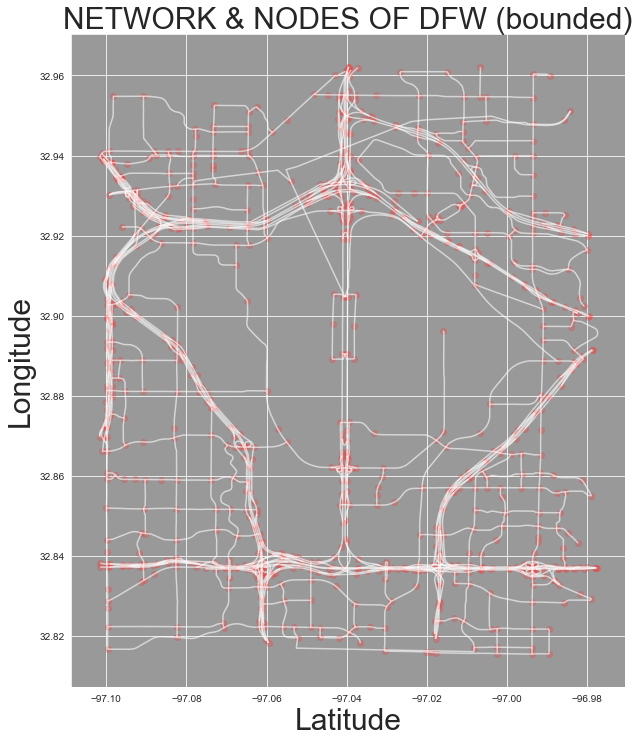

In [11]:
sns.set_style("darkgrid", {"axes.facecolor": ".6"})
fig, ax = plt.subplots(figsize=(12,12))
new_line.plot(color="#ffffFF99", ax=ax)
new_node.plot(color="#ff333340", ax=ax)
ax.set_title('NETWORK & NODES OF DFW (bounded)', fontdict={'fontsize': 30, 'fontweight': 'medium'})
ax.set_xlabel('Latitude', fontsize=30)
ax.set_ylabel('Longitude', fontsize=30) 

# To write new file to disk uncomment code below and set file path

In [12]:
import fiona 
path = r"/Users/jseverin/Athena/NREL_github/ATHENA-siem-sumo/Sumo/Network_Preprocessing/Data/Bounded_Net/DFW_combined_bounded.shp"
new_line.to_file(path)

/Users/jseverin/anaconda3/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
